In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder



In [2]:
# Step 1: Data Preprocessing
# Load training data into DataFrame
train_data = pd.read_csv('train.csv')

# Load testing data into DataFrame
test_data = pd.read_csv('test.csv')

# Convert 'date' column to datetime format
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])




In [3]:
# Set 'date' column as index
train_data.set_index('date', inplace=True)
test_data.set_index('date', inplace=True)

# Sort DataFrame by date
train_data.sort_index(inplace=True)
test_data.sort_index(inplace=True)


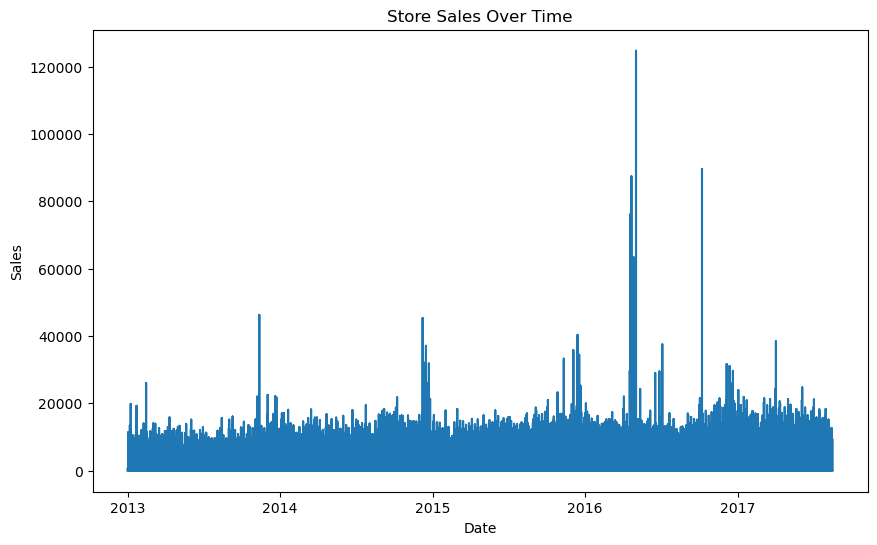

In [4]:
# Step 2: Time Series Analysis
# Visualize sales data over time
plt.figure(figsize=(10, 6))
plt.plot(train_data['sales'])
plt.title('Store Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [5]:

# Fit ARIMA model to entire training data
model = ARIMA(train_data['sales'], order=(5,1,0))
fitted_model = model.fit()



/Users/ruby/miniconda3/envs/ml/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ruby/miniconda3/envs/ml/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ruby/miniconda3/envs/ml/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [6]:
# Forecast future sales for test data
forecast = fitted_model.forecast(steps=len(test_data))

/Users/ruby/miniconda3/envs/ml/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [7]:
# Create DataFrame for submission
submission_df = pd.DataFrame({'id': test_data['id'], 'sales': forecast})

# Save submission DataFrame to CSV file
submission_df.to_csv('submission.csv', index=False)

/var/folders/c4/xxlb_wnn10lfxxy1x3ls4mzm0000gn/T/ipykernel_12035/2321083539.py:2: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  submission_df = pd.DataFrame({'id': test_data['id'], 'sales': forecast})


ValueError: cannot reindex on an axis with duplicate labels